-----

# 회귀 분석 - 국내 프로야구 연봉 분석

### 바로가기

- [<Step1. 탐색> 프로야구 연봉 데이터 살펴보기](#<Step1.-탐색>-프로야구-연봉-데이터-살펴보기)
    - [프로야구 연봉 데이터셋의 기본 정보]
    - [회귀 분석에 사용할 피처 살펴보기]
- [<Step2. 예측> : 투수의 연봉 예측하기](#<Step2.-예측>-:-투수의-연봉-예측하기)
    - [피처들의 단위 맞춰주기 : 피처 스케일링]
    - [피처들의 단위 맞춰주기 : one-hot-encoding]
    - [피처들의 상관관계 분석]
    - [회귀 분석 적용하기]
- [<Step3. 평가> : 예측 모델 평가하기](#<Step3.-평가>-:-예측-모델-평가하기)
    - [어떤 피처가 가장 영향력이 강한 피처일까]
    - [예측 모델의 평가]
    - [회귀 분석 예측 성능을 높이기 위한 방법 : 다중 공선성 확인]
    - [믿을만한 피처로 다시 학습하기]
- [<Step4. 시각화> : 분석 결과의 시각화](#<Step4.-시각화>-:-분석-결과의-시각화)
    - [예상 연봉과 실제 연봉 비교]

-----

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Matplotlib is building the font cache; this may take a moment.


# <Step1. 탐색> 프로야구 연봉 데이터 살펴보기

### [프로야구 연봉 데이터셋의 기본 정보]

In [2]:
# Data Source : http://www.statiz.co.kr/

picher_file_path = '../data/picher_stats_2017.csv'
batter_file_path = '../data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

In [3]:
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [4]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [5]:
print(picher.shape)

(152, 22)


-----

### `[참고 - 한글을 사용하는 그래프]`
- 파이썬에서 matplotlib 기반의 시각화 툴을 이용할 때 한글 폰트를 사용하는 방법
    - 자신의 개발환경에 설치된 폰트 확인
        - `set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))`
    - 한글 폰트를 설정한 뒤, 축에 적용
        - 예시 :`mpl.rc('font', family='08SeoulHangang')`
    - 한글 폰트가 없다면, 네이버 나눔 폰트 설치

In [6]:
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist])) # 현재 OS 내에 설치된 폰트를 확인합니다.

{'.Aqua Kana',
 '.Keyboard',
 '.New York',
 '.SF Arabic',
 '.SF Arabic Rounded',
 '.SF Compact',
 '.SF Compact Rounded',
 '.SF NS Mono',
 '.SF NS Rounded',
 '.ThonburiUI',
 'Academy Engraved LET',
 'Al Bayan',
 'Al Nile',
 'Al Tarikh',
 'American Typewriter',
 'Andale Mono',
 'Apple Braille',
 'Apple Chancery',
 'Apple LiGothic',
 'Apple LiSung',
 'Apple SD Gothic Neo',
 'Apple Symbols',
 'AppleGothic',
 'AppleMyungjo',
 'Arial',
 'Arial Black',
 'Arial Hebrew',
 'Arial Narrow',
 'Arial Rounded MT Bold',
 'Arial Unicode MS',
 'Athelas',
 'Avenir',
 'Avenir Next',
 'Avenir Next Condensed',
 'Ayuthaya',
 'BM Dohyeon',
 'BM Hanna 11yrs Old',
 'BM Hanna Air',
 'BM Hanna Pro',
 'BM Jua',
 'BM Kirang Haerang',
 'BM Yeonsung',
 'Baghdad',
 'Bangla MN',
 'Bangla Sangam MN',
 'Baoli SC',
 'Baskerville',
 'Beirut',
 'BiauKai',
 'Big Caslon',
 'Bodoni 72',
 'Bodoni 72 Oldstyle',
 'Bodoni 72 Smallcaps',
 'Bodoni Ornaments',
 'Bradley Hand',
 'Brush Script MT',
 'Chalkboard',
 'Chalkboard SE',
 'Ch

In [7]:
mpl.rc('font', family='AppleGothic') # 자신의 OS에 존재하는 한글 폰트를 선택합니다. 없는경우, 네이버 나눔 폰트 설치 후 실행합니다.

###### 예측할 대상인 '연봉'에 대한 정보

In [8]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

<Axes: >

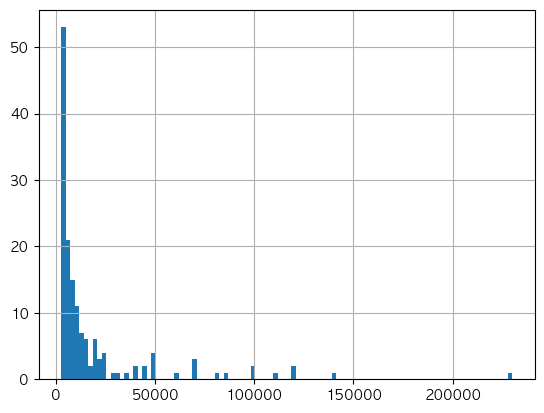

In [9]:
picher['연봉(2018)'].hist(bins=100) # 2018년 연봉 분포를 출력합니다.

<Axes: >

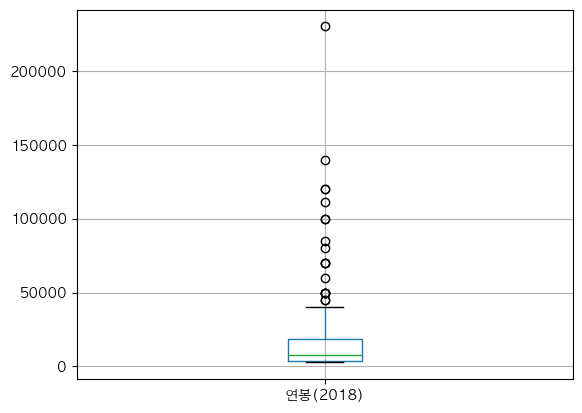

In [10]:
picher.boxplot(column=['연봉(2018)']) # 연봉의 Boxplot을 출력합니다.

-----

### [회귀 분석에 사용할 피처 살펴보기]

In [11]:
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]

In [12]:
# 피처 각각에 대한 histogram을 출력합니다.
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    # df의 column 갯수 만큼의 subplot을 출력합니다.
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

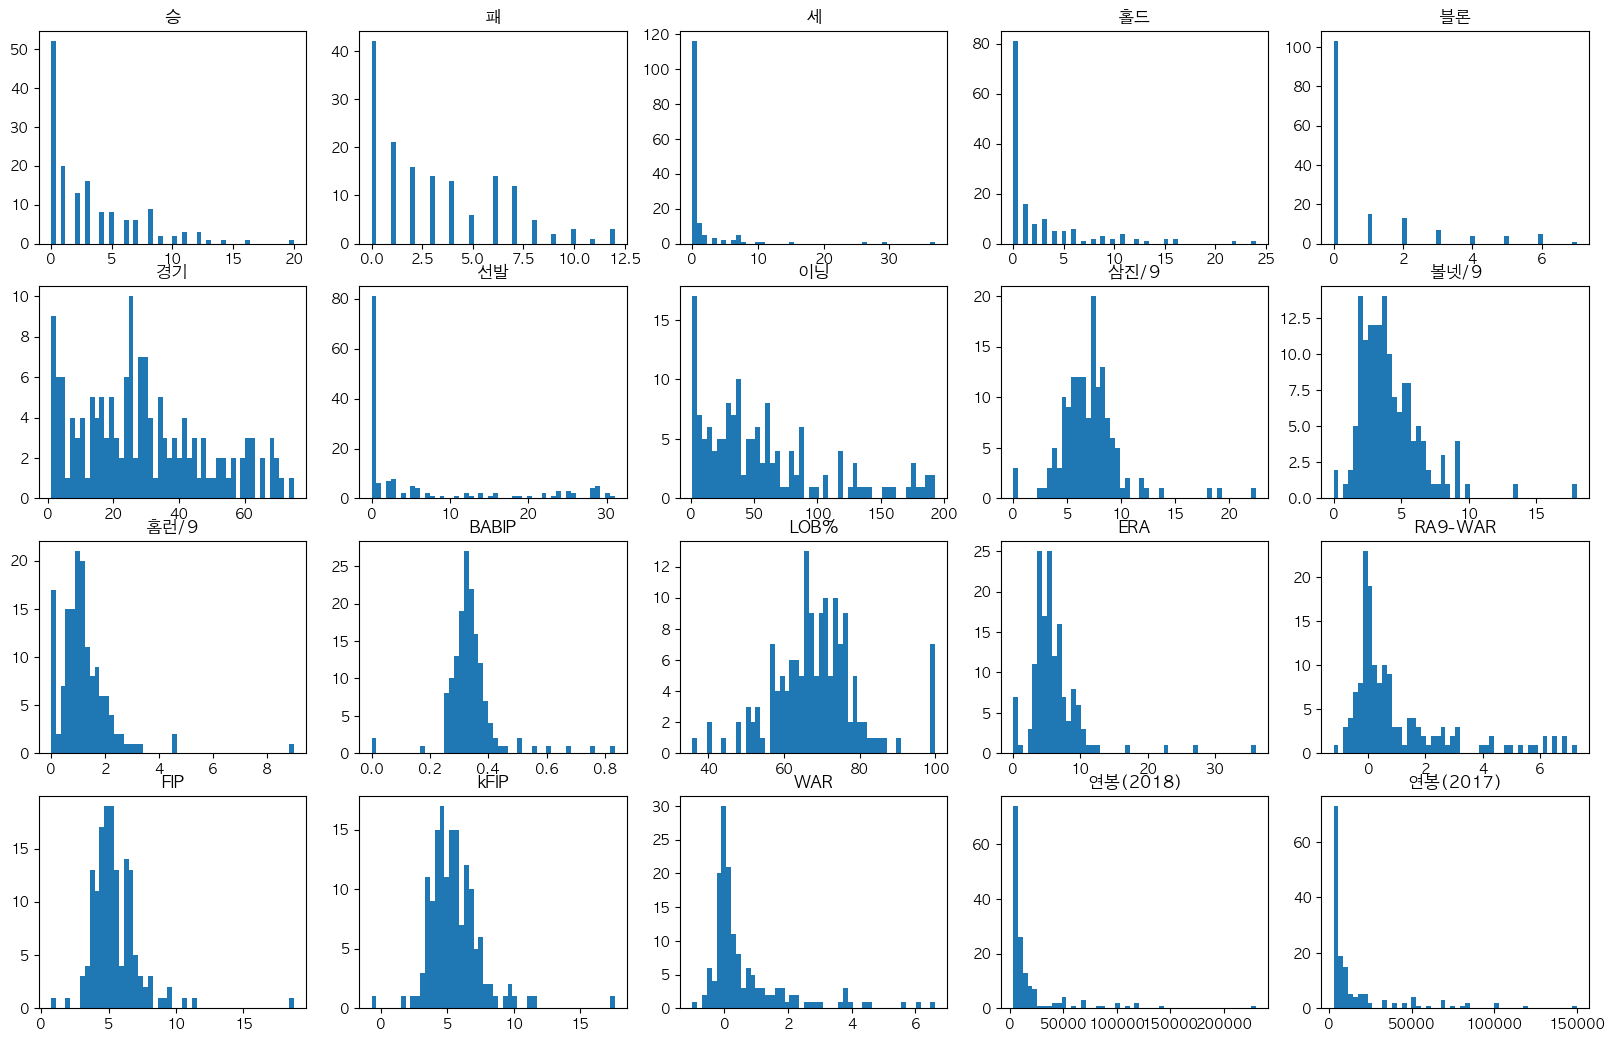

In [13]:
plot_hist_each_column(picher_features_df)

-----

# <Step2. 예측> : 투수의 연봉 예측하기

### [피처들의 단위 맞춰주기 : 피처 스케일링]

In [14]:
# pandas 형태로 정의된 데이터를 출력할 때, scientific-notation이 아닌 float 모양으로 출력되게 해줍니다.
pd.options.mode.chained_assignment = None

In [15]:
# 피처 각각에 대한 scaling을 수행하는 함수를 정의합니다.
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [16]:
# 피처 각각에 대한 scaling을 수행합니다.
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']
picher_df = standard_scaling(picher, scale_columns)

In [17]:
picher_df = picher_df.rename(columns={'연봉(2018)': 'y'})
picher_df.head(5)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


-----

### [피처들의 단위 맞춰주기 : one-hot-encoding]

In [18]:
# 팀명 피처를 one-hot encoding으로 변환합니다.
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis=1)
picher_df = picher_df.join(team_encoding)

In [19]:
team_encoding.head(5)

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,False,False,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False


In [20]:
picher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,False,False,False,False,True,False,False,False,False
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,False,False,True,False,False,False,False,False,False
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,True,False,False,False,False,False,False,False,False
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,False,False,True,False,False,False,False,False,False
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,False,False,False,False,False,False,True,False,False


-----

### [회귀 분석 적용하기]

##### 회귀 분석을 위한 학습, 테스트 데이터셋 분리

In [21]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리합니다.
X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

##### 회귀 분석 계수 학습 & 학습된 계수 출력

In [22]:
# 회귀 분석 계수를 학습합니다 (회귀 모델 학습)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [23]:
# 학습된 계수를 출력합니다.
print(lr.coef_)

[ -1481.01733901   -416.68736601 -94136.23649209  -1560.86205158
   1572.00472193   -747.04952389  -1375.53830289   -523.54687556
   3959.10653661    898.37638984  10272.48746451  77672.53804469
  -2434.38947427   -892.11801281    449.91117164   7612.15661812
   1271.04500059  -2810.55645139   5396.97279896  -4797.30275904
   -250.69773139    236.02530053  19130.59021357    854.02604585
   1301.61974637   3613.84063182   -935.07281796  18144.60099745]


In [24]:
picher_df.columns

Index(['선수명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', 'y',
       '연봉(2017)', 'KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성', '한화'],
      dtype='object')

-----

# <Step3. 평가> : 예측 모델 평가하기

### [어떤 피처가 가장 영향력이 강한 피처일까]

In [25]:
!pip install statsmodels

In [26]:
import statsmodels.api as sm

# statsmodel 라이브러리로 회귀 분석을 수행합니다.
X_train = sm.add_constant(X_train.astype(int))
model = sm.OLS(y_train.astype(int), X_train.astype(int)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     31.49
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           9.97e-36
Time:                        20:52:58   Log-Likelihood:                -1266.5
No. Observations:                 121   AIC:                             2589.
Df Residuals:                      93   BIC:                             2667.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7062.6398   1331.833      5.303      0.000    4417.883    9707.397
BABIP       -970.3716   2184.629     -0.444      0.658   -5308.611    3367.868
ERA          583.0883   2402.732      0.243      0.809   -4188.262    5354.439
FIP         -772.3738   3709.280     -0.208      0.836   -8138.268    6593.521
KIA        -2485.2198   2559.499     -0.971      0.334   -7567.878    2597.438
KT           272.3910   2454.954      0.111      0.912   -4602.662    5147.444
LG          1965.2950   2695.075      0.729      0.468   -3386.590    7317.180
LOB%         -38.8250   1845.003     -0.021      0.983   -3702.636    3624.986
NC          -111.7502   3116.159     -0.036      0.971   -6299.824    6076.324
RA9-WAR     3832.4758   3976.601      0.964      0.338   -4064.265    1.17e+04
SK          1143.0226   2638.668      0.433      0.666   -4096.849    6382.894
WAR         1.305e+04   3161.072      4.129      0.000    6774.731    1.93e+04
kFIP       -1710.7605   3728.250     -0.459      0.647   -9114.327    5692.806
경기         -1090.8663   2147.226     -0.508      0.613   -5354.832    3173.100
두산           240.1424   2970.513      0.081      0.936   -5658.707    6138.992
롯데          1537.3238   2867.565      0.536      0.593   -4157.092    7231.739
볼넷/9         468.5992   2290.015      0.205      0.838   -4078.917    5016.116
블론          2771.0267   1545.051      1.793      0.076    -297.139    5839.193
삼성         -2547.4095   2741.022     -0.929      0.355   -7990.536    2895.717
삼진/9       -1132.9818   2000.156     -0.566      0.572   -5104.895    2838.932
선발         -1474.5477   4457.985     -0.331      0.742   -1.03e+04    7378.128
세           2165.7770   1424.678      1.520      0.132    -663.351    4994.905
승           4789.6515   3438.335      1.393      0.167   -2038.200    1.16e+04
연봉(2017)    2.115e+04   1923.500     10.993      0.000    1.73e+04     2.5e+04
이닝           973.2614   3653.083      0.266      0.791   -6281.037    8227.560
패           3093.6312   2040.408      1.516      0.133    -958.215    7145.477
한화          7048.8444   2500.232      2.819      0.006    2083.879     1.2e+04
홀드          3823.0158   2006.178      1.906      0.060    -160.856    7806.888
홈런/9        2434.5640   2589.306      0.940      0.350   -2707.284    7576.412
==============================================================================
Omnibus:                       20.196   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.038
Skew:                           0.142   Prob(JB):                     5.71e-24
Kurtosis:                       7.599   Cond. No.                     8.37e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

[Text(0, 0, 'const'),
 Text(1, 0, 'BABIP'),
 Text(2, 0, 'ERA'),
 Text(3, 0, 'FIP'),
 Text(4, 0, 'KIA'),
 Text(5, 0, 'KT'),
 Text(6, 0, 'LG'),
 Text(7, 0, 'LOB%'),
 Text(8, 0, 'NC'),
 Text(9, 0, 'RA9-WAR'),
 Text(10, 0, 'SK'),
 Text(11, 0, 'WAR'),
 Text(12, 0, 'kFIP'),
 Text(13, 0, '경기'),
 Text(14, 0, '두산'),
 Text(15, 0, '롯데'),
 Text(16, 0, '볼넷/9'),
 Text(17, 0, '블론'),
 Text(18, 0, '삼성'),
 Text(19, 0, '삼진/9'),
 Text(20, 0, '선발'),
 Text(21, 0, '세'),
 Text(22, 0, '승'),
 Text(23, 0, '연봉(2017)'),
 Text(24, 0, '이닝'),
 Text(25, 0, '패'),
 Text(26, 0, '한화'),
 Text(27, 0, '홀드'),
 Text(28, 0, '홈런/9')]

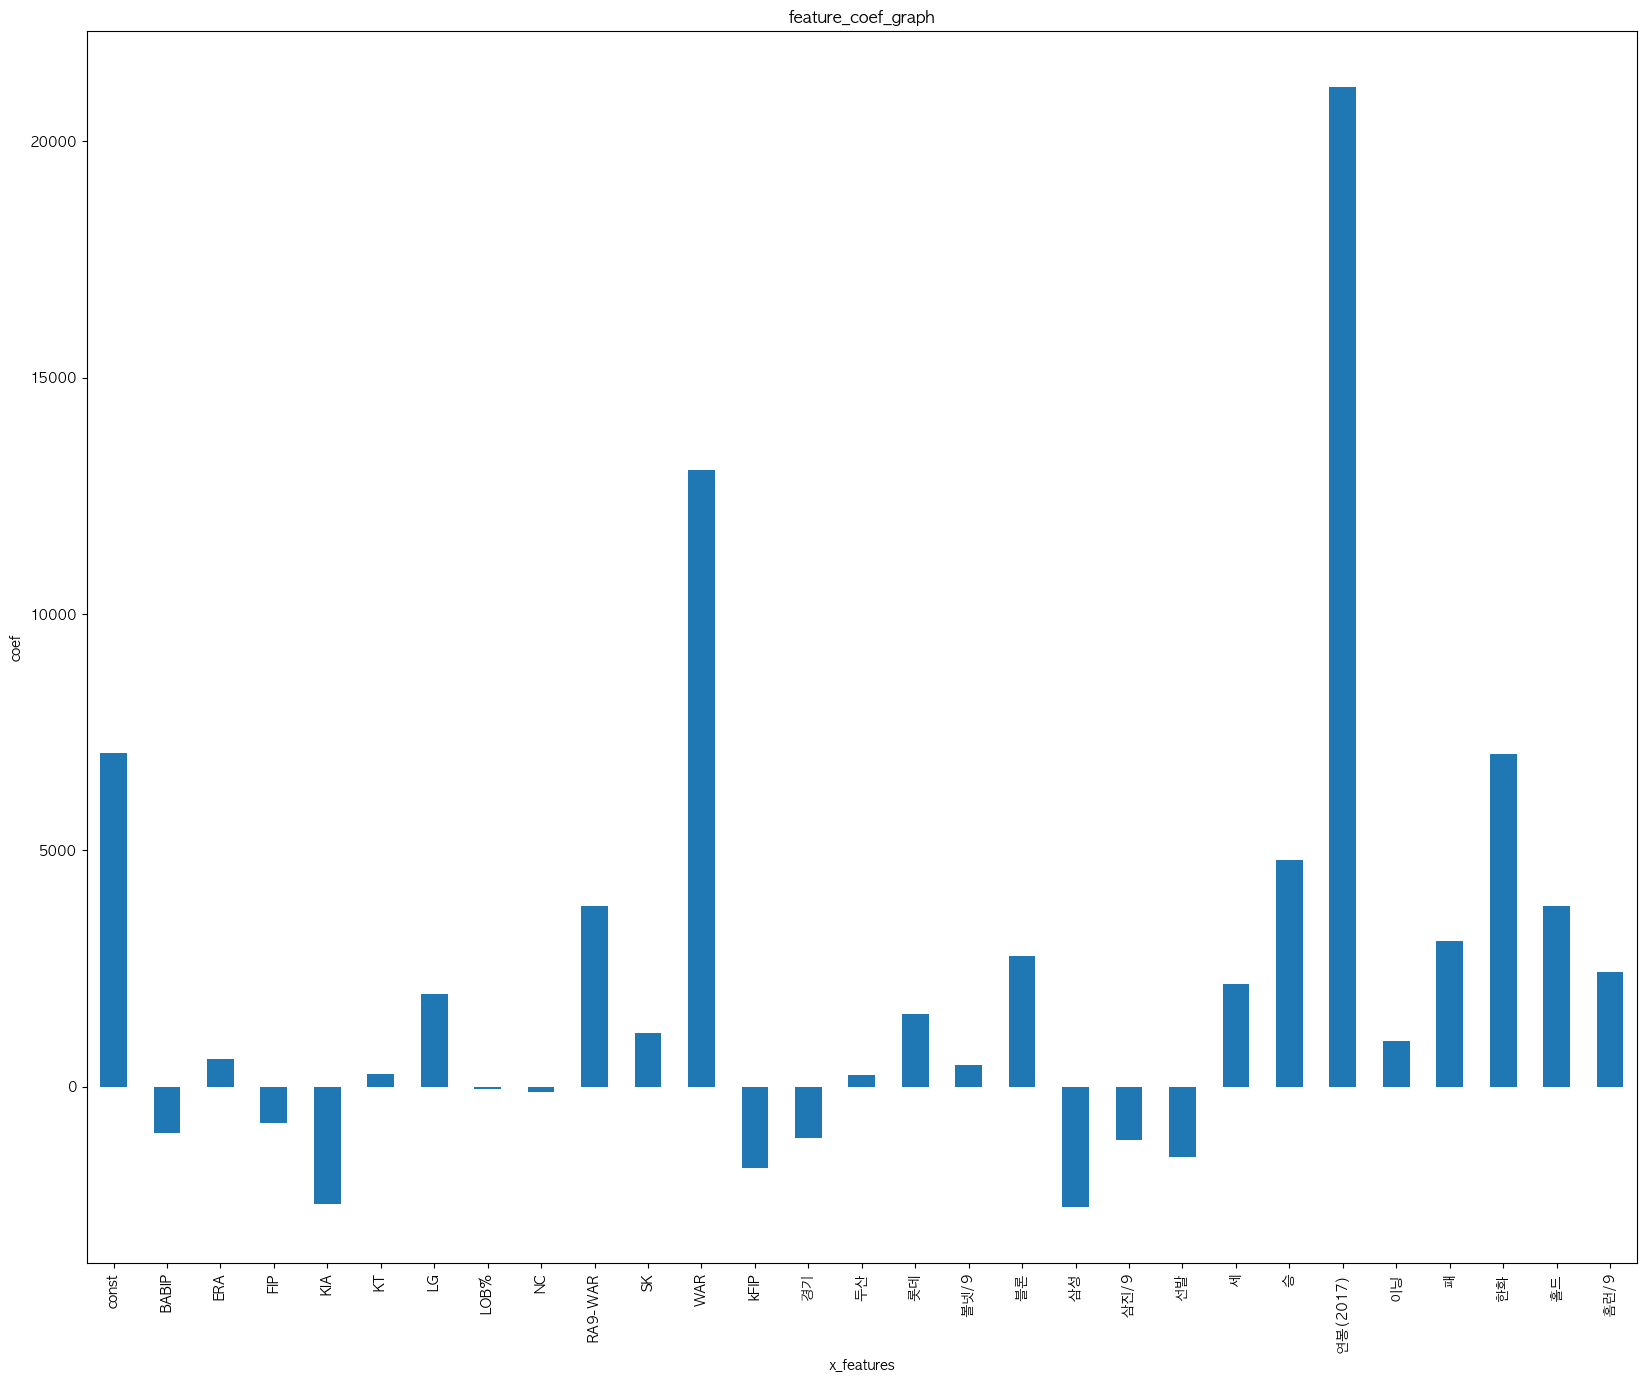

In [27]:
# 한글 출력을 위한 사전 설정 단계입니다.
mpl.rc('font', family='AppleGothic')
plt.rcParams['figure.figsize'] = [20, 16]

# 회귀 계수를 리스트로 반환합니다.
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명을 리스트로 반환합니다.
x_labels = model.params.index.tolist()

# 회귀 계수를 출력합니다.
ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

-----

### [예측 모델의 평가]

In [28]:
# 학습 데이터와 테스트 데이터로 분리합니다.
X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [29]:
# 회귀 분석 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

##### R2 score

In [30]:
# 회귀 분석 모델을 평가합니다.
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

0.9276949405576705
0.8860171644977815


##### RMSE score

In [31]:
# 회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

7282.7186847463745
14310.69643688915


-----

### [피처들의 상관관계 분석]

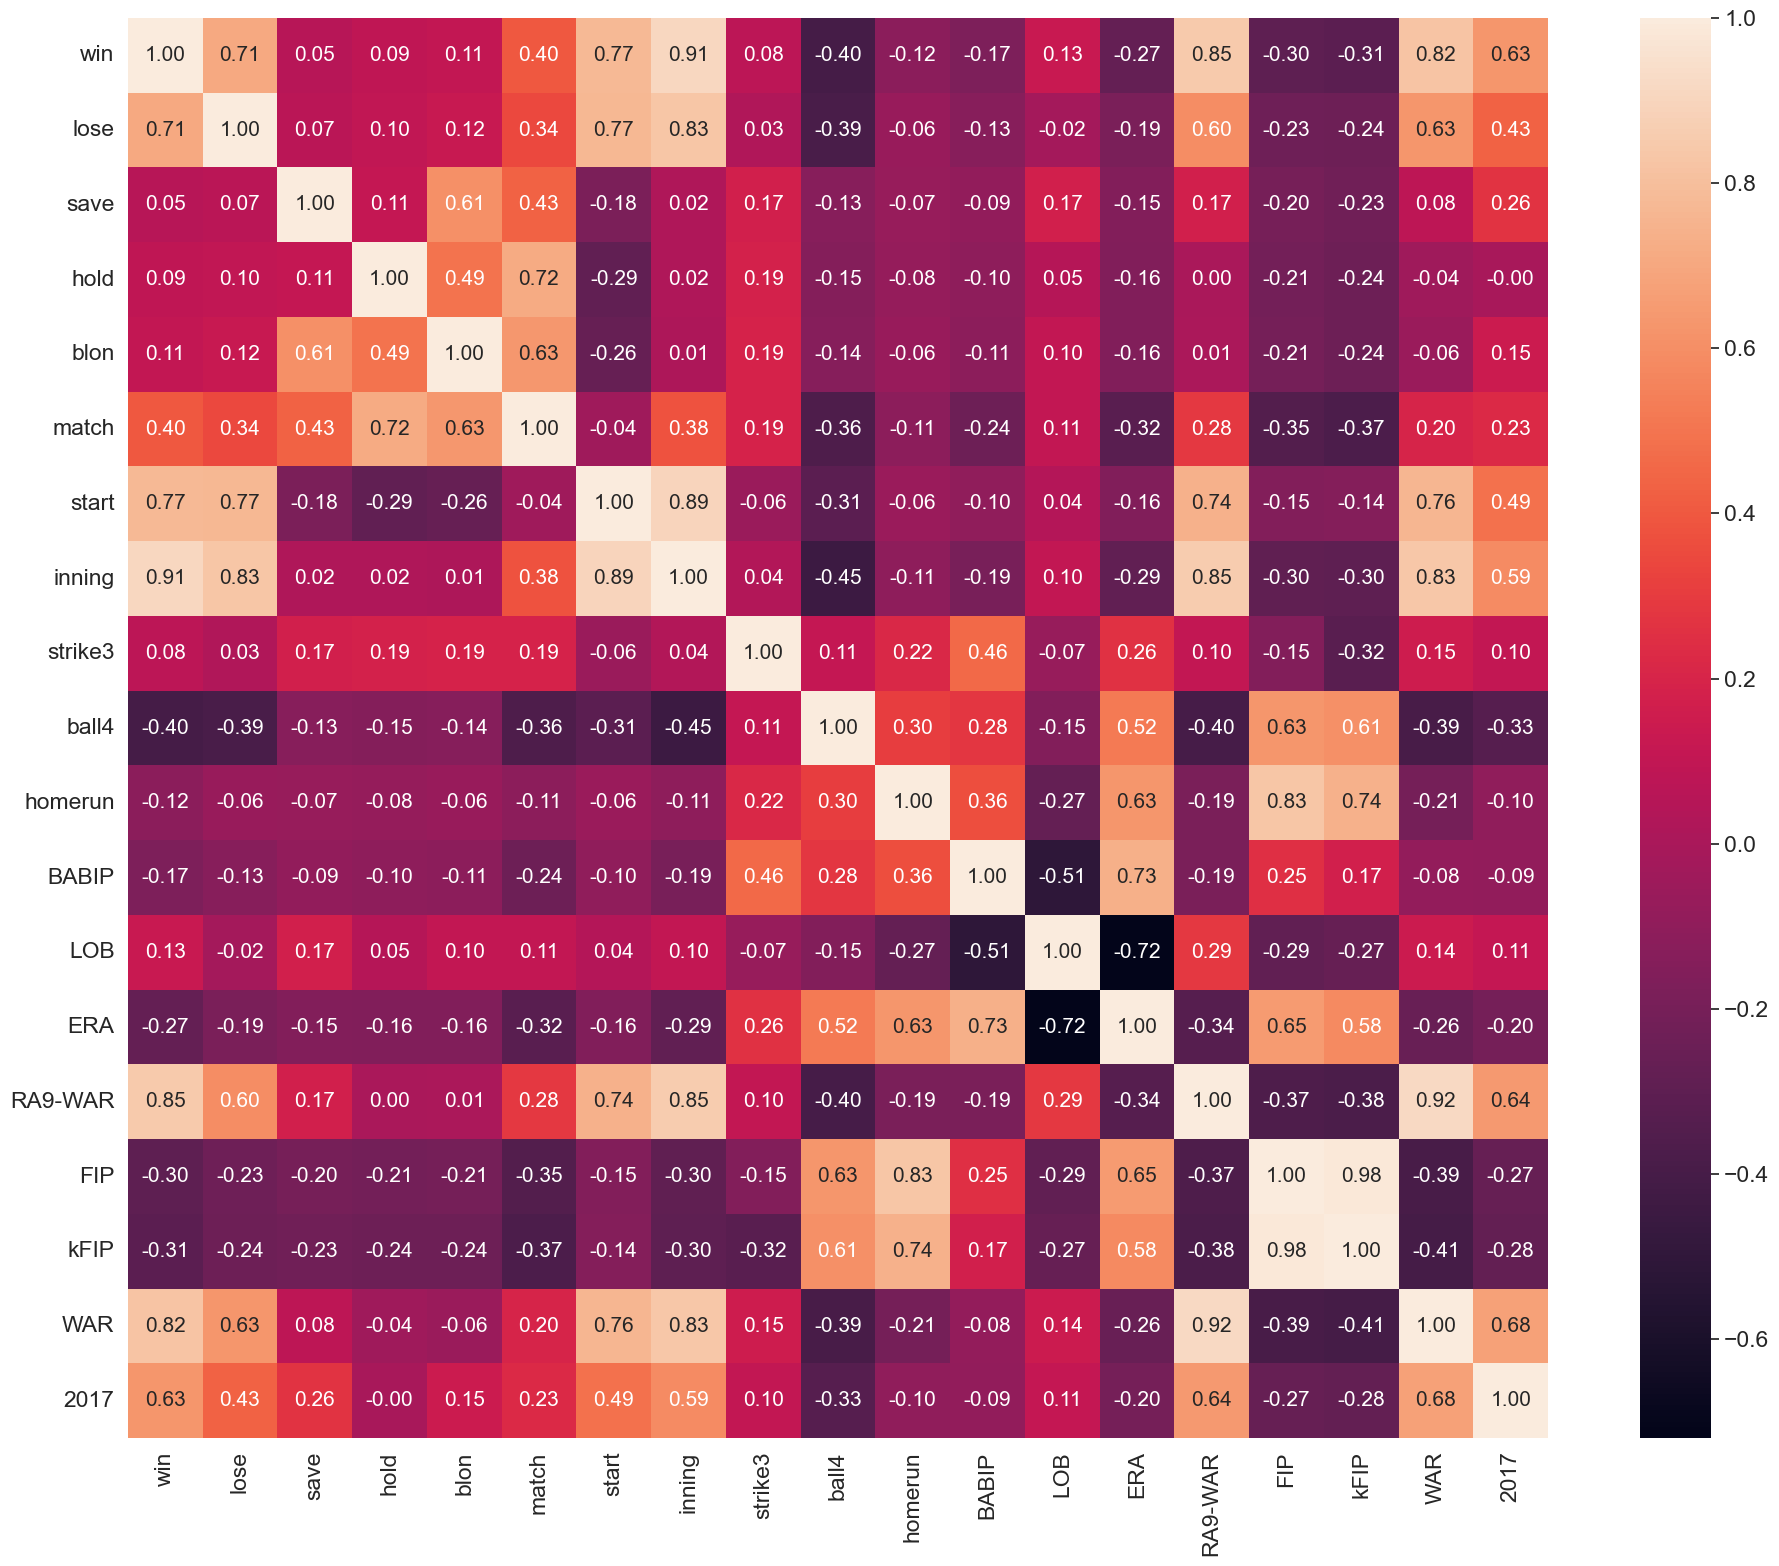

In [32]:
import seaborn as sns

# 피처간의 상관계수 행렬을 계산합니다.
corr = picher_df[scale_columns].corr(method='pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start', 
             'inning', 'strike3', 'ball4', 'homerun', 'BABIP', 'LOB', 
             'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '2017']

# corr 행렬 히트맵을 시각화합니다.
plt.rc('font', family='NanumGothicOTF')
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=show_cols,
            xticklabels=show_cols)

plt.tight_layout()
plt.show()

-----

### [회귀분석 예측 성능을 높이기 위한 방법 : 다중공선성 확인]

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values.astype('float64'), i, ) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,1.1,KIA
4,1.1,KT
5,1.1,LG
6,4.3,LOB%
7,1.1,NC
8,13.6,RA9-WAR
9,1.1,SK


### [적절한 피처로 다시 학습하기]

In [37]:
# 피처를 재선정합니다.
X = picher_df[['BABIP', 'LOB%', 'RA9-WAR', 'WAR', '블론', '볼넷/9', '삼진/9', '선발', '세', '승', '연봉(2017)', '패', '홀드']]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [38]:
# 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [39]:
# 결과를 출력합니다.
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

0.9214056648628508
0.8886506786928973


In [40]:
# 회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

7592.849871023244
14144.409728876715


In [41]:
# 피처마다의 VIF 계수를 출력합니다.
X = picher_df[['BABIP', 'LOB%', 'RA9-WAR', 'WAR', '블론', '볼넷/9', '삼진/9', '선발', '세', '승', '연봉(2017)', '패', '홀드']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,2.0,BABIP
1,1.7,LOB%
2,11.5,RA9-WAR
3,8.8,WAR
4,2.7,블론
5,1.4,볼넷/9
6,1.6,삼진/9
7,10.9,선발
8,2.5,세
9,6.4,승


-----

# <Step4. 시각화> : 분석 결과의 시각화

### [예상 연봉과 실제 연봉 비교]

In [42]:
# 2018년 연봉을 예측하여 데이터프레임의 column으로 생성합니다.
X = picher_df[['BABIP', 'LOB%', 'RA9-WAR', 'WAR', '블론', '볼넷/9', '삼진/9', '선발', '세', '승', '연봉(2017)', '패', '홀드']]
predict_2018_salary = lr.predict(X)
picher_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)

In [43]:
# 원래의 데이터 프레임을 다시 로드합니다.
picher = pd.read_csv(picher_file_path)
picher = picher[['선수명', '연봉(2017)']]

# 원래의 데이터 프레임에 2018년 연봉 정보를 합칩니다.
result_df = picher_df.sort_values(by=['y'], ascending=False)
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(picher, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰합니다.
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,0,양현종,230000,158909.210738,150000
1,1,켈리,140000,118404.380275,85000
2,2,소사,120000,91439.891361,50000
3,4,레일리,111000,100458.032050,85000
4,7,피어밴드,85000,63792.958659,35000
5,13,배영수,50000,53477.679755,55000
6,21,안영명,35000,21594.549438,20000
7,22,채병용,30000,22265.973059,25000
8,23,류제국,29000,39090.194635,35000
9,24,박정진,25000,28979.893933,33000


<Axes: xlabel='선수명'>

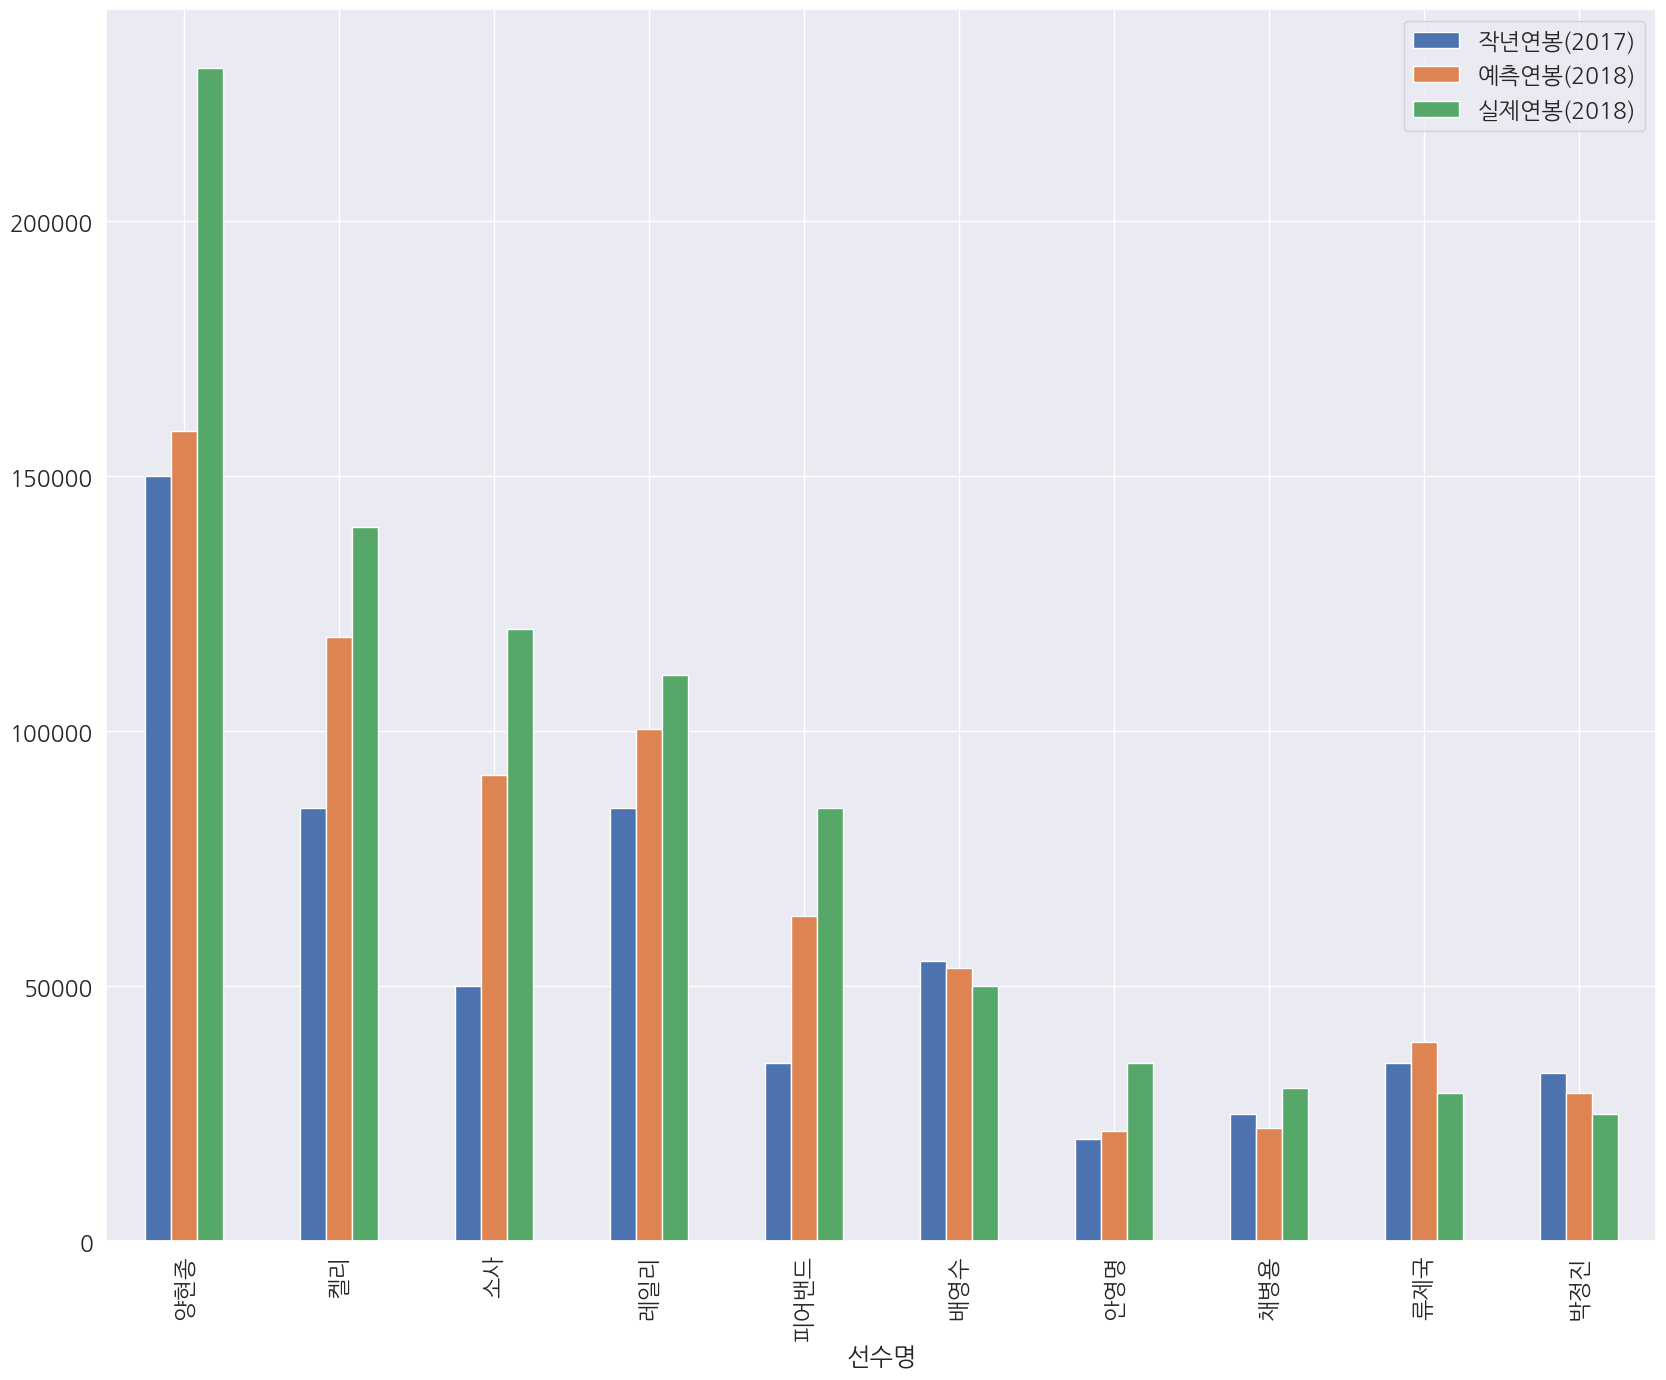

In [44]:
# 선수별 연봉 정보(작년 연봉, 예측 연봉, 실제 연봉)를 bar 그래프로 출력합니다.
mpl.rc('font', family='NanumGothicOTF')
result_df.plot(x='선수명', y=['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'], kind="bar")